Cedric Keller & Alexander Zank
# Assignment 5

This assignment is about visible light communication (VLC). LEDs act as transceivers and communicate using protocols that ensure no difference to "steady" light is visible to humans.

## Step 2

_What is the bandwidth of the optical spectrum?_

>The optical or visible spectrum is the range of wavelengths visible to the human eye.
>It ranges from 400THz (red) to around 800THz (violet). 
>In total, we therefore get a bandwidth of around 400THZ, which is a lot!  
>
>We can estimate the maximum throughput to be around 400 terabits/s using Stefan Mangold's rule of thumb.
  
  
_Is the visible spectrum regulated?_

>Concerning frequency, the visible spectrum is not regulated.
>Powerful light sources will, however, be regulated (such as strong lasers). 
  
  
_What is the difference between infrared and visible light?_

>Light in the frequency range of 300GHz to 400 THz is classified as infrared light.
>Infrared light has a lower frequency than visible light and is therefore not visible
>to humans. 
  
  
_Can infrared light penetrate water? Can visible light?_

>Looking at [this graph](https://en.wikipedia.org/wiki/Electromagnetic_absorption_by_water#/media/File:Absorption_spectrum_of_liquid_water.png)
>We can see that the visible spectrum is absorbed the most in water.
>This implies that visible light can barely penetrate water.
>50% of it is already absorbed within the first 10 meters. 
>Blue light is absorbed least and may reach depths of 100 meters.
>
>Infrared light is absorbed way less, which means it is able to penetrate much deeper.
  
  
_How do submarines communicate through the ocean when they operate below the water surface?_

>There are different possibilities depending on the depth of the submarine.
>If it is near the water surface, it may use (blue) light.
>
>Since light becomes less viable for lower depths,
>sonar (physical waves) might be used.
>
>There is also the possibility of extremely low-frequency radio waves,
>but these require giant antennas which consume enormous amounts of power.
  
  
_How can an LED be used as a receiver?_

>An LED behaves like a capacitor; It will slowly discharge after it is charged.
>The LED discharges faster if there is incoming light. This effect can be measured 
>and can therefore LEDs can detect incoming light.
  
  
_What are the benefits of using an LED instead of a photodiode as a receiver in consumer electronics?_

>In consumer electronics, cost plays a significant role. If we are able to reuse the LED as a receiver, 
>we do not have to add additional hardware in the form of a photodiode. 
>This massively reduces cost, especially in products where it is, for example, very expensive to add a hole
>for a photodiode. 
>With the LED as a receiver we simply have to change the microchip without further costs.
  
  



## Step 4

Using the provided ETH driver and microcontroller, we have implemented a two-way chat app powered by Python, "VLChat." Two devices connect to the microcontroller via serial and communicate by dispatching and reading streams of data transferred over light and processed by the microcontroller.

We use a threaded `Gateway` that dispatches and listens for messages over serial. The `CLI` runs on the main thread and communicated with the `Gateway` by means of two thread-safe queues. Unless the user enters input mode (by pressing the return key at any time), messages are printed to the console.

The setup is designed to be smart. For instance, serial ports are automatically discovered and sensible defaults provided. It also ensures that the system is correctly set-up by listening to affirmative responses.

Find the source code in the [GitHub Repository](https://github.com/AlexLike/ETH-WiNet-VLC-Lab).

| Overview  | Close-up  |
|---|---|
| ![](resources/vlchat-hw-overview.jpeg) | ![](resources/vlchat-hw-close.jpeg) |

| CLI (Setup)  | CLI (Messaging)  |
|---|---|
| ![](resources/vlchat-setup.png) | ![](resources/vlchat-interactive.png) |



## Step 5

Using our second application, "VLCollect," we measured several metrics' dependence on payload size and physical distance between the transceivers. Again, find the source code in the [GitHub Repository](https://github.com/AlexLike/ETH-WiNet-VLC-Lab).

Let's first read from our measurements:

In [102]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 3, 10, 20, 25, 30, 35])
x_count = X.size
Y = np.array([1, 10, 50, 100, 150, 200])
y_count = Y.size

throughputs = np.zeros(shape=(X.size, Y.size))
mean_delays = np.zeros(shape=(X.size, Y.size))
standard_deviation_delays = np.zeros(shape=(X.size, Y.size))
width_of_confidence_interval = np.zeros(shape=(X.size, Y.size))
success_rates_150B = np.zeros(X.size)
success_rates_35cm = np.zeros(Y.size)

for (i, x) in enumerate(X):
  for (j, y) in enumerate(Y):
    with open(f"results/{x}cm-{y}B-results.csv", "r") as f:
      (success_rate, throughput, mean_delay_s, standard_deviation_delay_s, cl, cr) = list(map(float, f.readline().split(", ")))
      throughputs[i][j] = throughput
      mean_delays[i][j] = mean_delay_s
      standard_deviation_delays[i][j] = standard_deviation_delay_s
      width_of_confidence_interval[i][j] = cr - cl
      if y == 150:
        success_rates_150B[i] = success_rate
      if x == 35:
        success_rates_35cm[j] = success_rate


X_m, Y_m = np.meshgrid(X, Y)

Throughput is mostly dependent on payload size. The larger the payload, the higher the throughput if reception is strong. This makes sense! Every transmitted packet comes with some communication overhead. Approaching the maximum payload size of $200\mathrm B$, we see diminishing returns. At our largest measured distance, a smaller package size was actually more advantageous since dropped packets this way did not incur such high of a penalty.

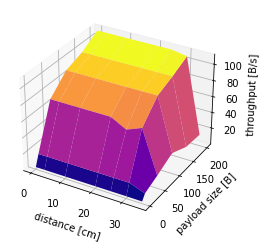

In [77]:
plt3D, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X_m, Y_m, throughputs.transpose(), cmap="plasma", antialiased=True)
ax.set_xlabel("distance [cm]")
ax.set_ylabel("payload size [B]")
ax.set_zlabel("throughput [B/s]")
plt.show()

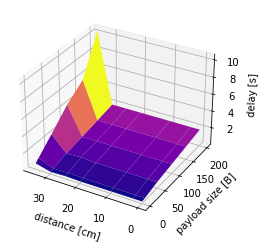

In [78]:
plt3D, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X_m, Y_m, mean_delays.transpose(), cmap="plasma", antialiased=True)
ax.invert_xaxis()
ax.set_xlabel("distance [cm]")
ax.set_ylabel("payload size [B]")
ax.set_zlabel("delay [s]")
plt.show()

_(Caution! The x-axis has been inverted here to aid readability.)_

Unsurprisingly, at a fixed distance, the delay grows linearly with the payload size. Additionally, no huge differences are aparent until the distance threshold of $35\mathrm{cm}$ is reached. If you inspect the data points, latency does grow in the $\mathrm{ms}$ range. In comparison to the last point, though, this is neglegible.

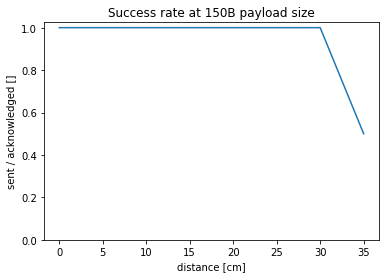

In [112]:
plt.plot(X, success_rates_150B)
plt.xlabel("distance [cm]")
plt.ylabel("sent / acknowledged []")
plt.ylim(bottom=0)
plt.title("Success rate at 150B payload size")
plt.show()

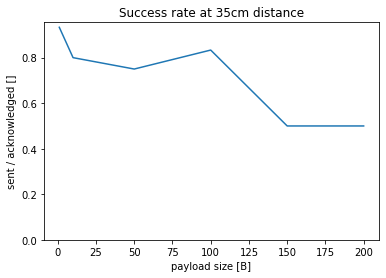

In [114]:
plt.plot(Y, success_rates_35cm)
plt.xlabel("payload size [B]")
plt.ylim(bottom=0)
plt.ylabel("sent / acknowledged []")
plt.title("Success rate at 35cm distance")
plt.show()

Surprisingly, the system is very reliable at short distances (especially considering how audiocom struggles with echo and artifacts even at close ranges). When the threshold of $35\mathrm{cm}$ is reached, a lower payload size increased overall reliability since a packet loss this way incurred less time wasted.

Find all the data (including standard deviation, 98% confidence interval, and concrete measures in the results folder on the [GitHub Repository](https://github.com/AlexLike/ETH-WiNet-VLC-Lab)). Below we visualized some of these metrics:

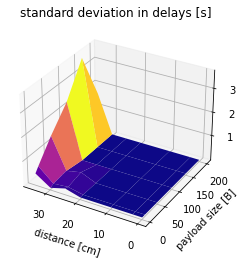

In [115]:
plt3D, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X_m, Y_m, standard_deviation_delays.transpose(), cmap="plasma", antialiased=True)
ax.invert_xaxis()
ax.set_xlabel("distance [cm]")
ax.set_ylabel("payload size [B]")
ax.set_title("standard deviation in delays [s]")
plt.show()

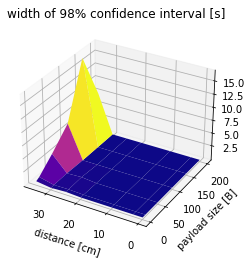

In [116]:
plt3D, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X_m, Y_m, width_of_confidence_interval.transpose(), cmap="plasma", antialiased=True)
ax.invert_xaxis()
ax.set_xlabel("distance [cm]")
ax.set_ylabel("payload size [B]")
ax.set_title("width of 98% confidence interval [s]")
plt.show()

All in all, VLC is a promising tool for low-cost communication over short distances. We can also see applications in physical presence detection. Ultrawideband might be replaced by VLC for highly secure applications.